In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
t1 = pd.read_csv("2017-2018_datos_my.csv")
t2 = pd.read_csv("2018-2019_datos_my.csv")
t3 = pd.read_csv("2019-2020_datos_my.csv")
t4 = pd.read_csv("2020-2021_datos_my.csv")
t5 = pd.read_csv("2021-2022_datos_my.csv")

In [3]:
datos = pd.concat([t1,t2,t3,t4,t5], ignore_index = True)
#Quitamos columnas no numericas y columnas con muchos nan para no perder tantos datos
datos = datos.drop(['Unnamed: 0','ID','NAME','NATION','POSITION', 'TEAM', '%TOTALDRIBBLES', 'PRESSURE', '%PRESSUREWIN', '%VSDRIBLETACKLE'], axis = 1)
#Quitamos jugadores con datos NaN
df = datos.dropna()

In [4]:
############LIMPIAMOS COLUMNAS ###########

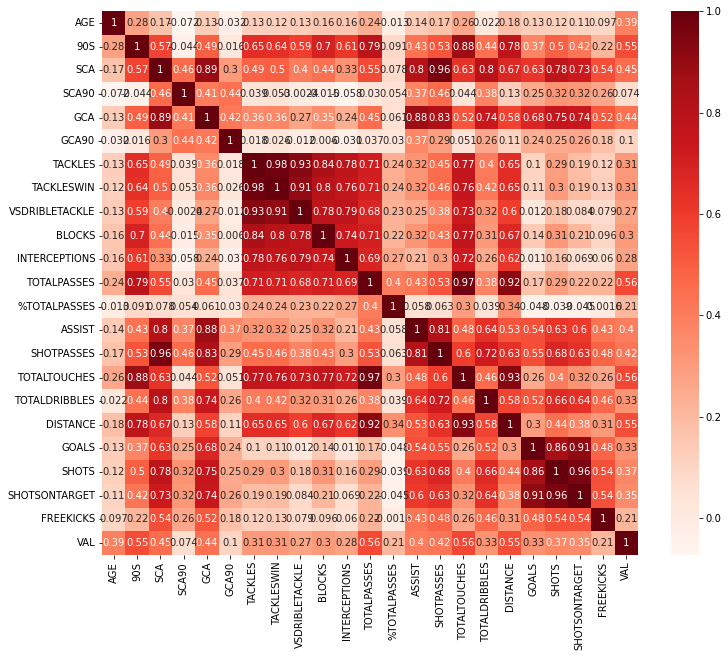

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
#Correlation with output variable
cor_target = abs(cor["VAL"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features
#df = df.drop(['SCA90', 'GCA90', 'VSDRIBLETACKLE', 'INTERCEPTIONS', '%TOTALPASSES', 'FREEKICKS'], axis = 1)

AGE              0.393015
90S              0.548593
SCA              0.451807
GCA              0.442617
TACKLES          0.306163
TACKLESWIN       0.309466
BLOCKS           0.301737
TOTALPASSES      0.556422
ASSIST           0.398541
SHOTPASSES       0.423614
TOTALTOUCHES     0.563779
TOTALDRIBBLES    0.325780
DISTANCE         0.545407
GOALS            0.331045
SHOTS            0.367476
SHOTSONTARGET    0.353571
VAL              1.000000
Name: VAL, dtype: float64

In [7]:
###########LIMPIAMOS OUTLIERS ############
z=np.abs(stats.zscore(df))
lista = []
for i in range(len(z)):
    lista.append(z.iloc[i].mean())
df['ZSCORE'] = lista
df1 = df[abs(df['ZSCORE']) < 1.5]
df1 = df1.drop(['ZSCORE'], axis = 1)

C:\Users\irait\AppData\Local\Temp\ipykernel_22016\2926299463.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ZSCORE'] = lista


In [8]:
df1n=(df1-df1.mean())/df1.std()
df1n = df1n.drop(['VAL'],axis = 1)
df1n['VAL'] = df1['VAL']

In [9]:
df1n.to_csv("datos_limpios_my")